In [2]:
import pandas as pd

file_path = '/Users/andrejosadcij/documents/python/SampleSuperstore.csv'
df = pd.read_csv(file_path)

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Общая информация
print("Размер данных:", df.shape)
print("\nИнформация о столбцах:")
df.info()

Размер данных: (9994, 13)

Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
print("Названия колонок:")
for col in df.columns:
    print("-", col)

Названия колонок:
- Ship Mode
- Segment
- Country
- City
- State
- Postal Code
- Region
- Category
- Sub-Category
- Sales
- Quantity
- Discount
- Profit


Как видим из названия колонок, то можно разделить действующий датасет на несколько структур, которые потом перекочуют в домены -
1. Доставка
2. Клиентский сегмент
3. Географический
4. Товар
5. Факты (в нашем случае продажи)


### 2. Проверка полноты

In [4]:
# Количество пропусков по каждому столбцу
missing_per_column = df.isna().sum()
missing_percent = (df.isna().mean() * 100).round(2)

print("\nПропуски по столбцам:")
display(pd.DataFrame({'Missing': missing_per_column, 'Percent': missing_percent}))


Пропуски по столбцам:


,Missing,Percent
Ship Mode,0,0.0
Segment,0,0.0
Country,0,0.0
City,0,0.0
State,0,0.0
Postal Code,0,0.0
Region,0,0.0
Category,0,0.0
Sub-Category,0,0.0
Sales,0,0.0


Пропуспок по данным нет, отлично.

### 3. Проверка валидности и форматов

In [5]:
# Проверяем соответствие типов данных и базовую статистику
print("\nЧисловые колонки — статистика:")
display(df.describe())

print("\nСтроковые колонки — длины строк:")
str_cols = df.select_dtypes(include='object').columns
for col in str_cols:
    lengths = df[col].astype(str).str.len()
    print(f"{col:25s}  Max: {lengths.max():5.0f}  Min: {lengths.min():5.0f}  Avg: {lengths.mean():6.2f}")


Числовые колонки — статистика:


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000



Строковые колонки — длины строк:
Ship Mode                  Max:    14  Min:     8  Avg:  12.82
Segment                    Max:    11  Min:     8  Avg:   8.84
Country                    Max:    13  Min:    13  Avg:  13.00
City                       Max:    17  Min:     4  Avg:   9.33
State                      Max:    20  Min:     4  Avg:   8.49
Region                     Max:     7  Min:     4  Avg:   4.86
Category                   Max:    15  Min:     9  Avg:  12.80
Sub-Category               Max:    11  Min:     3  Avg:   7.19


Все форматы колонок корректны. 

### 4. Проверка наличия полных дублей

In [6]:
# Проверим дубликаты строк
duplicate_rows = df[df.duplicated()]
print(f"\nКоличество дублированных строк: {len(duplicate_rows)}")

if 'id' in df.columns:
    print("Дубликаты по id:", df['id'].duplicated().sum())


Количество дублированных строк: 17


Есть полные дубликаты. Уберём их.

In [11]:
# Удаляем дубликаты
df = df.drop_duplicates()

# Проверяем, остались ли дубликаты
print("После очистки:", df.duplicated().sum())

После очистки: 0


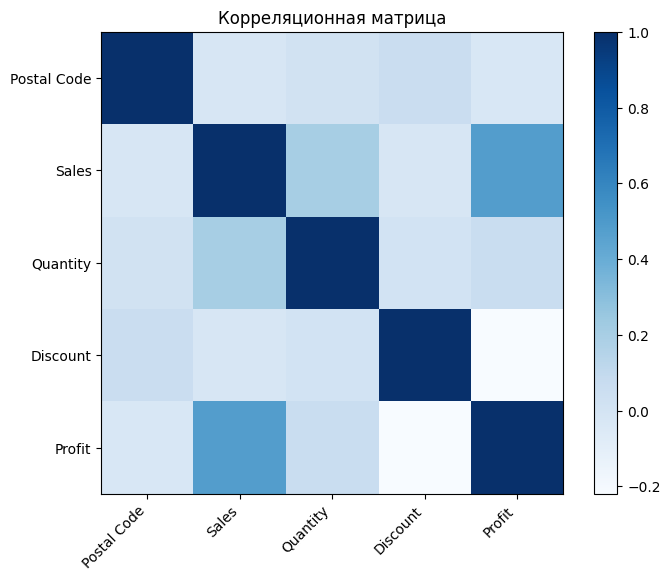

In [7]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['number']).columns
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(8,6))
    plt.imshow(corr, cmap='Blues')
    plt.colorbar()
    plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right')
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title("Корреляционная матрица")
    plt.show()

* Sales и Profit можно рассматривать как сильно взаимосвязанные метрики → при моделировании лучше не использовать обе как независимые признаки (во избежание мультиколлинеарности).
* Discount оказывает заметное отрицательное влияние на прибыль → полезно для построения витрин KPI и для бизнес-инсайтов (оптимизация скидок).
* Quantity не определяет прибыль напрямую, что указывает на неравномерную маржинальность товаров.
* Postal Code не несёт числового смысла и в DV-модели пойдёт как часть бизнес-ключа географии, но не в аналитические метрики.

Выгрузим очищенный файл на компьютер

In [12]:
import os
print(os.getcwd())

/Users/andrejosadcij


In [13]:
df.to_csv('/Users/andrejosadcij/Documents/SampleSuperstore_clean.csv', index=False, encoding='utf-8')